In [1]:
#Import the module and other libraries
import line_detection_updated as ld
import image_rotation as ir
import satmetrics

from astropy.io import fits
import astropy.visualization as aviz

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [2]:
#Set filepaths
current_user_filepath = 'Data'
img1 = current_user_filepath + '/calexp-0941420_07.fits'
img2 = current_user_filepath + '/calexp-0941422_33.fits'
img3 = current_user_filepath + '/calexp-0941424_34.fits'
img4 = current_user_filepath + '/calexp-0941426_16.fits'
img5 = current_user_filepath + '/calexp-0941424_37.fits'
img6 = current_user_filepath + '/STARLINK-1892-20220305200929.fits'
img7 = current_user_filepath + '/STARLINK-1892-N-20220305200959.fits'
img8 = current_user_filepath + '/STARLINK-1905-20220305191929.fits'
img_multiple_streaks = current_user_filepath + '/bi327715.fits'





In [29]:
#What is the working image?

current_image_filepath = img8
image_dict = satmetrics.file_ingest(current_image_filepath)
working_image = image_dict['image_list'][0] #Each fits file can have multiple science images. 


08/11/2022 01:44:43 AM Number of detected lines = 34


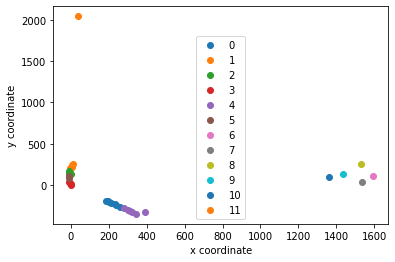

In [30]:
#Get the Hough transformation results
detector = ld.LineDetection(image=working_image.data)
results_ht = detector.hough_transformation()
clustered_lines = ld.cluster(results_ht["Cartesian Coordinates"], results_ht["Lines"], plot_image=True)

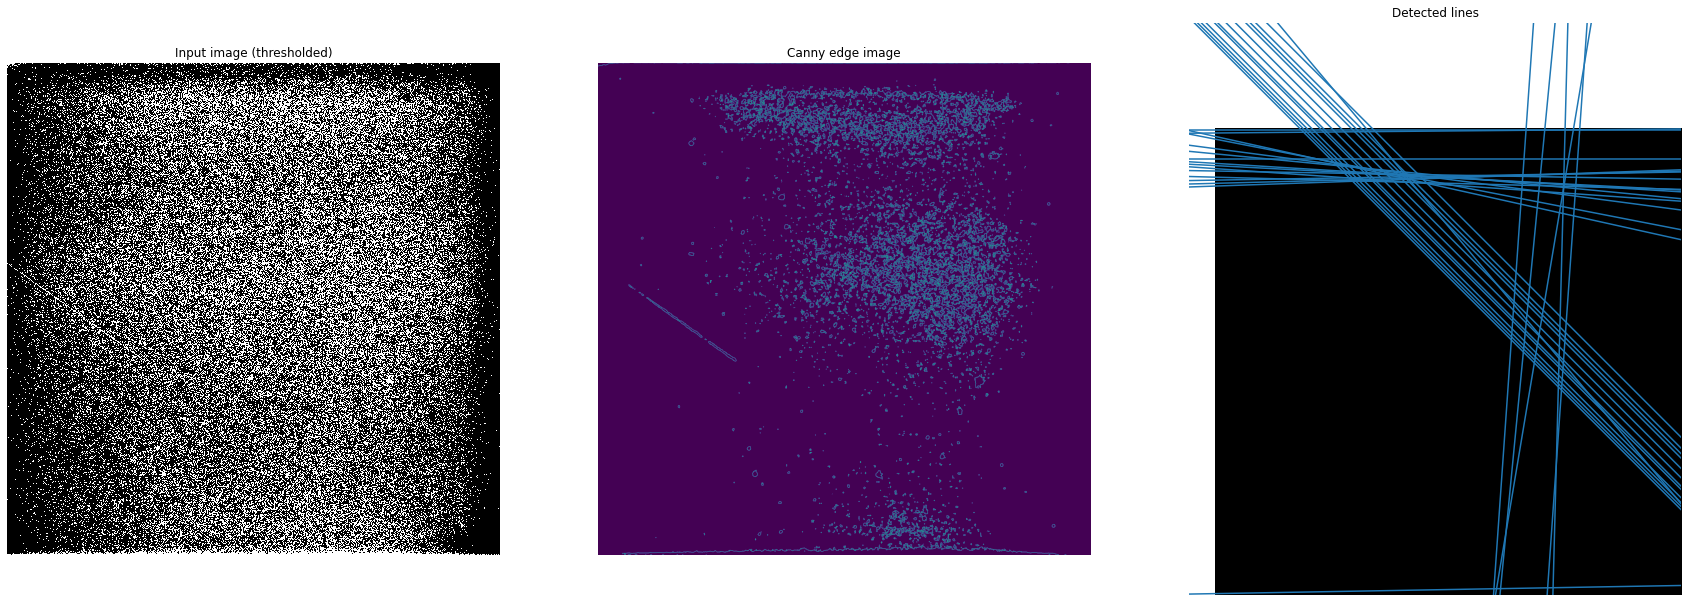

In [31]:
#Plots of line detection
fig, axes = plt.subplots(1, 3, figsize=(30, 30))
ax = axes.ravel()

ld.show(results_ht['Thresholded Image'], cmap="gray", ax=ax[0], interpolation="none")
ax[0].set_title('Input image (thresholded)')
ax[0].set_axis_off()

ld.show(results_ht["Edges"], ax=ax[1])
ax[1].set_title('Canny edge image')
ax[1].set_axis_off()

#Detected lines
blank_image = np.zeros(detector.image.shape)

ld.show(blank_image, cmap="gray", ax=ax[2])

ax[2].set_axis_off()
ax[2].set_title('Detected lines')

cart_coords = results_ht['Cartesian Coordinates']
angles = results_ht['Angles']
for i in range(len(cart_coords)):
    ax[2].axline(cart_coords[i], slope=np.tan(angles[i] + np.pi/2))


In [20]:
clustered_lines

array([[1.44000000e+03, 1.06465084e+00, 5.00000000e+00],
       [1.76600000e+03, 1.05592420e+00, 3.00000000e+00],
       [1.23200000e+03, 1.06465084e+00, 0.00000000e+00],
       [5.15000000e+02, 1.08210414e+00, 8.00000000e+00],
       [8.66000000e+02, 1.07337749e+00, 6.00000000e+00],
       [1.58900000e+03, 1.06465084e+00, 4.00000000e+00],
       [3.45000000e+02, 1.09083078e+00, 9.00000000e+00],
       [6.94000000e+02, 1.07337749e+00, 7.00000000e+00],
       [1.08500000e+03, 1.07337749e+00, 1.00000000e+00],
       [1.09600000e+03, 1.06465084e+00, 1.00000000e+00],
       [1.92300000e+03, 1.05592420e+00, 2.00000000e+00],
       [1.24500000e+03, 1.05592420e+00, 0.00000000e+00]])

In [21]:
results_ht['Cartesian Coordinates']

[(698.1258531547254, 1259.4523782807298),
 (869.6200071427229, 1537.0481590298627),
 (597.2854521434873, 1077.5314791957355),
 (241.77785483473366, 454.71801032234737),
 (413.219486384821, 761.0556195652618),
 (770.3624865714297, 1389.7707146444995),
 (159.3032715660867, 306.01873744648645),
 (331.1481796201683, 609.8990761874038),
 (517.7172548816752, 953.5165672382323),
 (531.3513437899854, 958.5831990247776),
 (946.9305060789673, 1673.694003292427),
 (613.0673323288165, 1083.592841445175)]